In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from PIL import Image
from skimage import io

Text(0, 0.5, 'Trials')

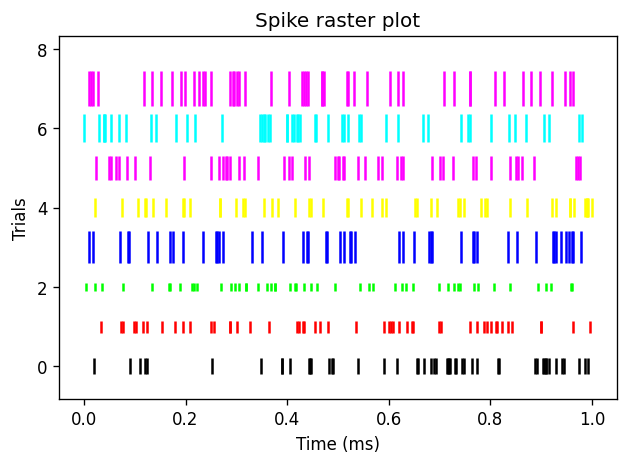

In [23]:
n6 = loadmat("six.mat")['six']
neuralData = np.random.random([8, 50])
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 0],
                        [1, 0, 1],
                        [0, 1, 1],
                        [1, 0, 1]])
lineSize = [0.4, 0.3, 0.2, 0.8, 0.5, 0.6, 0.7, 0.9]
plt.figure(dpi=120)
plt.eventplot(neuralData,  color=colorCodes, linelengths = lineSize) 
plt.title('Spike raster plot')
plt.xlabel('Time (ms)')
plt.ylabel('Trials')

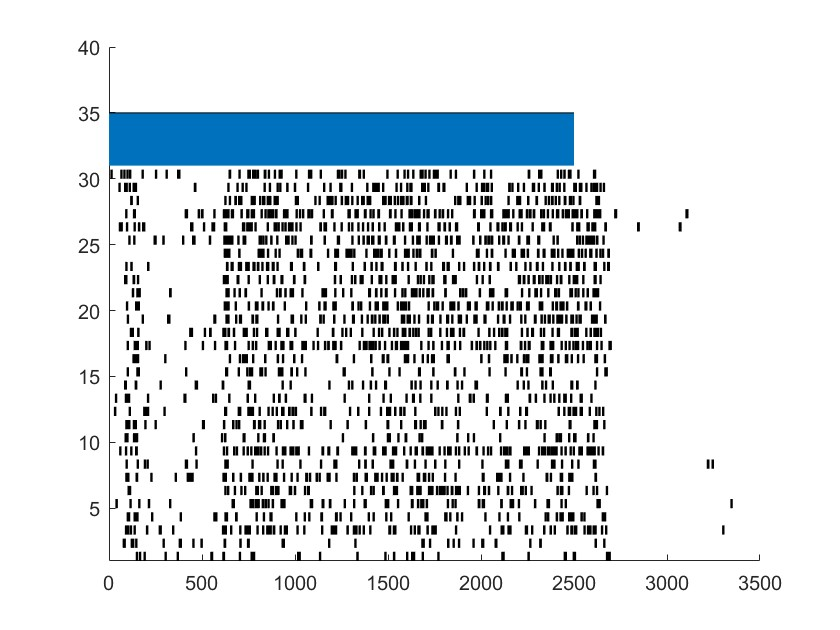

In [4]:
# img_orig = io.imread('rasterPlot.jpg')
# plt.imshow(img_orig)
# plt.show()
# """
# imshow()接收一张图像，只是画出该图，并不会立刻显示出来。imshow后还可以进行其他draw操作
# 所有画完后使用plt.show()才能进行结果的显示。
# """
# matlab
display(Image.open('rasterPlot.jpg'))

#### Peri-Stimulus Time Histogram (PSTH)

Text(0.5, 0, 'Times in ms')

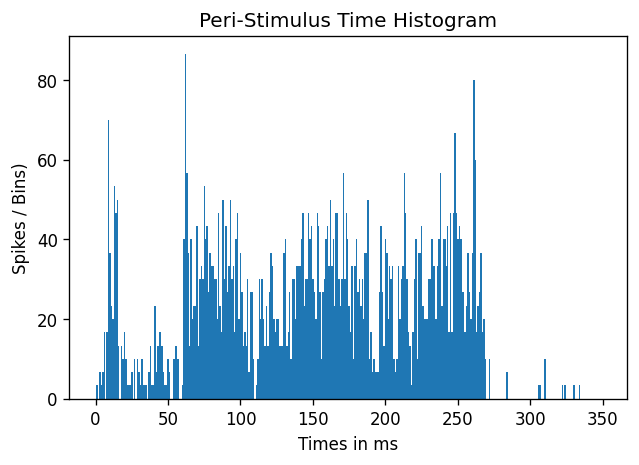

In [14]:
### Solution 1: 
n_trial, times = n6.shape
time_bin = 10
group = int(times / time_bin)
Hz_s = np.zeros(group)
## remember: np.array, [行，列]
for i in range(group):
    Hz_s[i] = n6[:, i * 10: i * 10 + 9].sum() * 100 / n_trial
plt.figure(dpi=120)
plt.bar(np.arange(group), Hz_s, width=1) # 柱形图绘制
plt.title("Peri-Stimulus Time Histogram")
plt.ylabel("Spikes / Bins)")
plt.xlabel("Times in ms")

### Solution2: np.his绘制
Hz_2 = [] 
for trial in range(n_trial):   # getting time steps where spiking occurred
    for time_step in range(times):
        if n6[trial][time_step] == 1:
            Hz_2.append(time_step)

y = [0, 5, 10, 15, 25]
c_y = [round(i * 100 / n_trial) for i in y]
plt.hist(Hz_2, bins=350) # bins表示分成的组数目，10ms一组
plt.xlabel("Time in ms")
plt.ylabel("Spikes / Bin")
plt.yticks(y, labels=c_y) # 显示的纵坐标

#### A continuous measure of firing rate

Text(0, 0.5, 'Firing Rate in Hz')

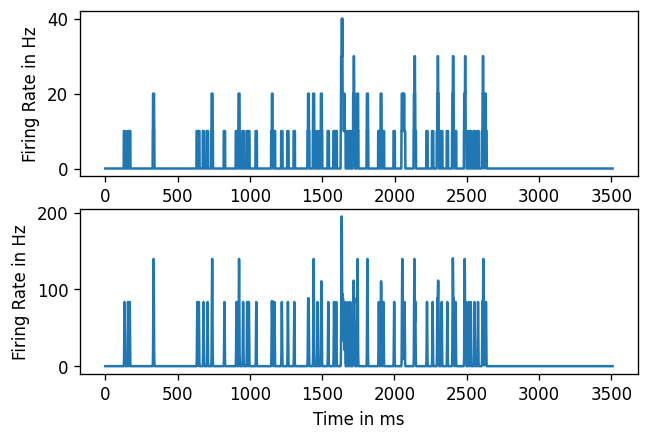

In [69]:
# a boxcar1 kernel of width 10ms
box_kernel = np.ones(10) / 10
y = np.convolve(n6[9], box_kernel, mode='full') * 100
plt.figure(dpi=120)
plt.subplot(2, 1, 1)
plt.plot(y)
plt.xlabel("Time in ms")
plt.ylabel("Firing Rate in Hz")

def gauss(mu, sigma):
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 11)
    k = (1 / sigma * np.sqrt(2 * np.pi)) * np.exp((-1) * pow((x - mu), 2) / (2 * pow(sigma, 2)))
    return k

gauss_kernel = gauss(5, 3)
# plt.plot(gauss_kernel)
y_2 = np.convolve(n6[9], gauss_kernel, mode='full') * 100
plt.subplot(2, 1, 2)
plt.plot(y_2)
plt.xlabel("Time in ms")
plt.ylabel("Firing Rate in Hz")

In [60]:
x = np.linspace(0 - 3 * 1, 0 + 3 * 1, 11)
print(x)

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


#### Tuning Curve

The 112.5 orientation is the most responsive.


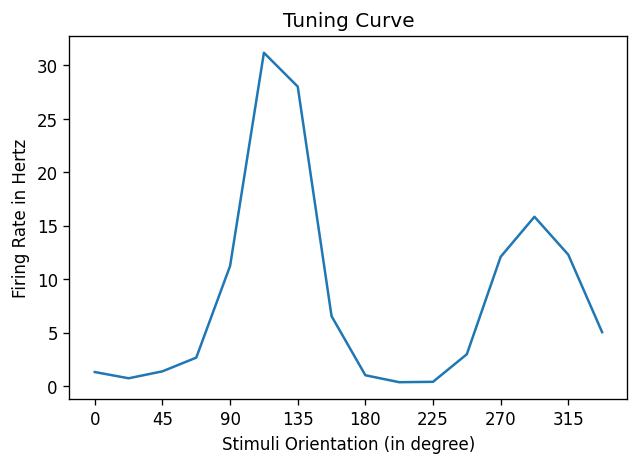

In [51]:
n_all = loadmat("dataSur.mat")['spikes'] # shape: (18, 3500, 30)
n_stimulus = n_all[:, 500:2500,:]
spikes = np.sum(n_stimulus, axis=1) # shape: (18, 30)
average_spikes = np.mean(spikes, axis=1) / 2
x_angle = np.arange(0, 360, 22.5)
plt.figure(dpi=120)
plt.plot(x_angle, average_spikes[:-2])
x_converted = np.arange(0, 360, 45)
plt.xticks(x_converted) # 修改x轴横坐标
plt.title("Tuning Curve")
plt.xlabel("Stimuli Orientation (in degree)")
plt.ylabel("Firing Rate in Hertz")

print("The {} orientation is the most responsive.".format(x_angle[np.argmax(average_spikes)]))

#### Blank stimulus

Text(0, 0.5, 'Firing Rate in Hertz')

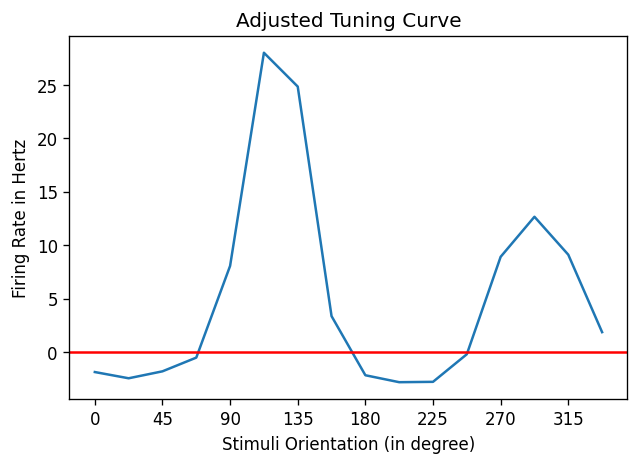

In [57]:
fr_17, fr_18 = average_spikes[-2:]
blank_spikes = (fr_17 + fr_18) / 2

plt.figure(dpi=120)
plt.plot(x_angle, average_spikes[:-2] - blank_spikes)
plt.axhline(y=0, c="red") # 添加水平直线
x_converted = np.arange(0, 360, 45)
plt.xticks(x_converted) # 修改x轴横坐标
plt.title("Adjusted Tuning Curve")
plt.xlabel("Stimuli Orientation (in degree)")
plt.ylabel("Firing Rate in Hertz")

## 其中